In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import re

import config_error_by_period_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_error_by_period(df: pd.core.frame.DataFrame) -> None:
    """Plot error by period"""
    df_average = df[-1:]
    dim = config.epoch // config.period
    data_to_visualize = df_average.iloc[:, :dim]

    x_labels = list(range(0, config.epoch, config.period))

    plt.figure(figsize=(10, 6))
    # plt.plot(x_labels, data_to_visualize.values[0], marker='o', linestyle='-')
    plt.plot(x_labels, data_to_visualize.values[0], linestyle='-')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.show()

In [4]:
def plot_error_by_period_multiple_with_labels(df_list: list, labels: list) -> None:
    """Plot error by period for multiple dataframes"""
    plt.figure(figsize=(10, 6))

    dim = config.epoch // config.period
    x_labels = list(range(0, config.epoch, config.period))

    for i, (df, label) in enumerate(zip(df_list, labels)):
        df_average = df[-1:]
        data_to_visualize = df_average.iloc[:, :dim]

        # Use regular expression to match label and extract case number
        match = re.search(r'Case (\d+)', label)
        if match:
            case_number = int(match.group(1)) - 1  # Subtract 1 to match with color_dict index
        else:
            case_number = i  # Default to index if label doesn't match

        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        plt.plot(x_labels, data_to_visualize.values[0], linestyle='-', color=color, label=label)

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.legend()
    plt.show()

## Case 1

In [5]:
case1_df = load_csv_data(config.case1_error_by_period_path)
case1_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000,Unnamed: 400,Unnamed: 401
0,1.99500,2.19750,2.12250,2.17125,2.38125,2.25750,1.48875,1.01625,0.735000,0.68625,...,0.506250,0.51000,0.506250,0.510000,0.506250,0.51375,0.51000,0.50625,NaN,242.906
1,1.99500,2.16000,2.19000,2.17125,2.24250,2.01750,1.61250,0.85500,0.678750,0.63375,...,0.502500,0.50625,0.555000,0.502500,0.513750,0.50625,0.50625,0.50625,NaN,242.115
2,1.99500,2.14875,2.19000,2.22375,2.35875,2.05875,1.75500,1.11000,0.701250,0.70125,...,0.513750,0.51375,0.513750,0.513750,0.513750,0.51375,0.49500,0.50625,NaN,242.265
3,1.99500,2.19000,2.28375,2.20875,2.32875,2.23875,1.57125,0.84000,0.690000,0.71250,...,0.491250,0.49125,0.491250,0.491250,0.491250,0.49125,0.49125,0.49125,NaN,240.334
4,1.99500,2.16375,2.23500,2.20500,2.33250,2.23125,1.59750,0.87375,0.675000,0.64875,...,0.491250,0.52125,0.491250,0.517500,0.510000,0.51000,0.51000,0.51000,NaN,246.495
5,1.99500,2.19750,2.15250,2.11125,2.19750,2.27250,1.57500,0.89250,0.705000,0.72750,...,0.506250,0.49875,0.585000,0.498750,0.513750,0.48750,0.52500,0.51375,NaN,245.468
6,1.99500,2.16000,2.17500,2.19000,2.36250,2.05500,1.36500,0.92625,0.731250,0.73500,...,0.517500,0.50625,0.491250,0.502500,0.491250,0.50250,0.49125,0.50250,NaN,243.442
7,2.01750,2.16750,2.16750,2.26125,2.23125,2.22750,1.65750,0.84375,0.705000,0.69375,...,0.543750,0.55875,0.536250,0.536250,0.540000,0.55125,0.54000,0.56250,NaN,250.106
8,1.99500,2.19750,2.22000,2.23875,2.28375,2.11125,1.60125,1.17375,0.753750,0.71250,...,0.502500,0.49875,0.502500,0.498750,0.502500,0.49875,0.50250,0.49875,NaN,245.948
9,1.99500,2.16750,2.20125,2.23125,2.29125,2.02875,1.57500,0.84375,0.671250,0.63375,...,0.498750,0.49500,0.498750,0.495000,0.498750,0.49500,0.49875,0.48750,NaN,240.064


In [6]:
# Get last row using values[] 
case1_df_average = case1_df[-1:]
dim = config.epoch // config.period
case1_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39001~39100,39101~39200,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000
10,1.99725,2.175,2.19375,2.20125,2.301,2.14987,1.57988,0.9375,0.704625,0.6885,...,0.501375,0.50475,0.507375,0.51,0.517125,0.506625,0.508125,0.507,0.507,0.5085


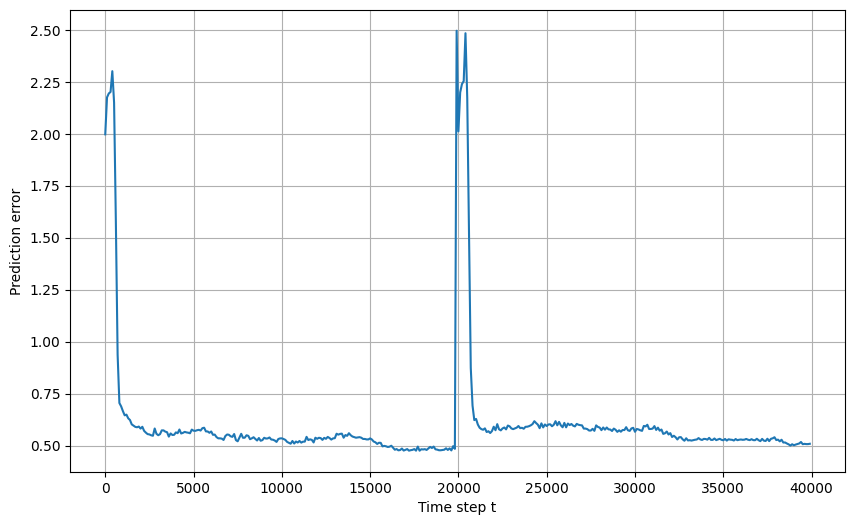

In [7]:
plot_error_by_period(df=case1_df)

# Case 2

In [8]:
case2_df = load_csv_data(config.case2_error_by_period_path)
case2_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000,Unnamed: 400,Unnamed: 401
0,2.41875,4.42500,4.08750,4.10625,4.61250,4.51875,5.06250,4.95000,4.72500,4.83750,...,1.93125,2.13750,2.90625,2.19375,3.50625,3.50625,2.49375,2.77500,NaN,1208.64
1,2.51250,4.25625,4.06875,3.80625,4.68750,4.68750,4.91250,4.80000,5.06250,4.36875,...,2.98125,1.53750,2.86875,1.53750,2.70000,1.59375,2.77500,1.57500,NaN,1150.89
2,2.19375,4.72500,3.88125,3.75000,3.80625,4.21875,4.57500,4.87500,5.00625,4.51875,...,2.15625,2.71875,2.26875,3.35625,2.49375,3.03750,2.15625,2.90625,NaN,1142.36
3,2.28750,4.48125,4.65000,4.48125,4.36875,4.50000,4.03125,4.59375,4.21875,3.48750,...,2.15625,2.96250,2.55000,2.71875,1.85625,1.98750,2.45625,2.19375,NaN,1110.00
4,2.38125,5.08125,5.06250,4.80000,4.91250,4.44375,3.97500,3.88125,4.03125,4.10625,...,2.19375,2.88750,2.71875,3.58125,2.90625,2.73750,3.61875,2.86875,NaN,1156.52
5,2.51250,3.61875,4.01250,4.29375,4.72500,4.68750,5.02500,4.48125,4.63125,4.85625,...,2.10000,2.13750,1.80000,1.87500,2.15625,2.83125,2.13750,1.51875,NaN,1148.94
6,2.25000,4.42500,4.61250,4.44375,4.35000,4.68750,4.51875,4.51875,4.57500,4.14375,...,2.08125,2.04375,2.40000,1.83750,2.41875,1.66875,1.98750,2.60625,NaN,1142.36
7,2.28750,3.37500,4.81875,3.93750,4.18125,4.42500,4.38750,3.90000,4.83750,4.55625,...,2.23125,2.64375,2.47500,2.60625,2.77500,2.11875,2.49375,2.30625,NaN,1130.64
8,2.28750,4.70625,3.43125,3.60000,4.16250,4.38750,4.59375,4.91250,4.40625,4.36875,...,2.62500,2.62500,2.70000,2.66250,2.62500,2.73750,2.68125,2.73750,NaN,1171.84
9,2.45625,4.23750,4.89375,5.06250,5.02500,4.72500,4.93125,4.72500,4.68750,4.29375,...,2.00625,2.08125,2.00625,2.08125,2.00625,2.08125,2.00625,2.08125,NaN,1143.75


In [9]:
# Get last row using values[] 
case2_df_average = case2_df[-1:]
dim = config.epoch // config.period
case2_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39001~39100,39101~39200,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000
10,2.35875,4.33313,4.35187,4.22813,4.48313,4.52813,4.60125,4.56375,4.61813,4.35375,...,2.70563,2.30625,2.24625,2.3775,2.46938,2.445,2.54438,2.43,2.48063,2.35688


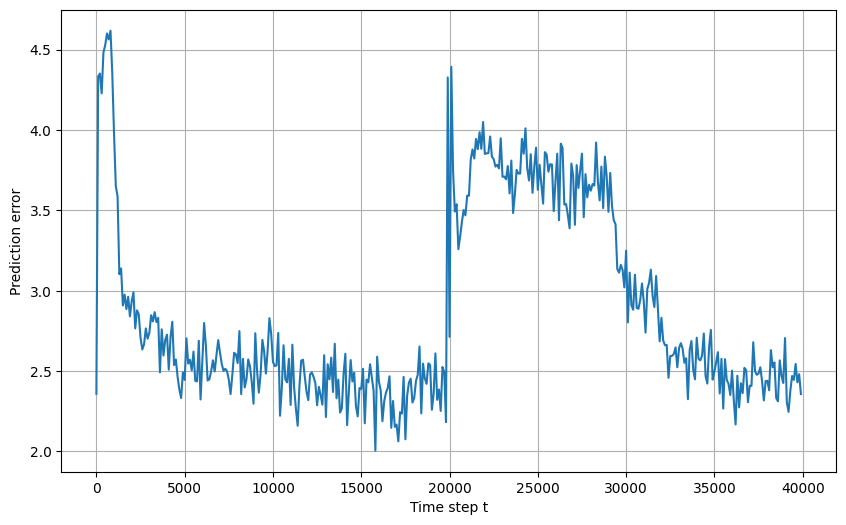

In [10]:
plot_error_by_period(df=case2_df)

# Case 3

In [11]:
case3_df = load_csv_data(config.case3_error_by_period_path)
case3_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000,Unnamed: 400,Unnamed: 401
0,2,2.01625,2.01250,2.03500,2.32125,2.17250,1.56750,0.748750,0.52250,0.368750,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,117.146
1,2,2.01000,2.01375,2.03500,2.32375,2.17625,1.57250,0.753750,0.52750,0.371250,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,117.693
2,2,2.01000,2.01750,2.04000,2.32875,2.18125,1.57375,0.753750,0.52750,0.371250,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,117.175
3,2,2.02000,2.02500,2.04000,2.32750,2.18125,1.57375,0.753750,0.52625,0.371250,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,118.155
4,2,2.00500,2.02125,2.13000,2.23000,2.03000,1.40125,0.553750,0.44125,0.340000,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,120.060
5,2,2.01250,2.01750,2.04375,2.32500,2.17375,1.56875,0.753750,0.52750,0.371250,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,117.790
6,2,2.00750,2.00750,2.13000,2.23625,2.03250,1.40375,0.556250,0.44625,0.342500,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,117.830
7,2,2.01250,2.02000,2.04000,2.37000,1.95875,1.62375,0.698750,0.53000,0.408750,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,117.664
8,2,2.00750,2.01250,2.13875,2.24125,2.04250,1.40375,0.556250,0.44375,0.340000,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,117.986
9,2,2.02250,2.02500,2.04500,2.37250,1.95875,1.62000,0.697500,0.53000,0.408750,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,NaN,118.685


In [12]:
# Get last row using values[] 
case3_df_average = case3_df[-1:]
dim = config.epoch // config.period
case3_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39001~39100,39101~39200,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000
10,2,2.01237,2.01725,2.06775,2.30763,2.09075,1.53088,0.682625,0.50225,0.369375,...,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25


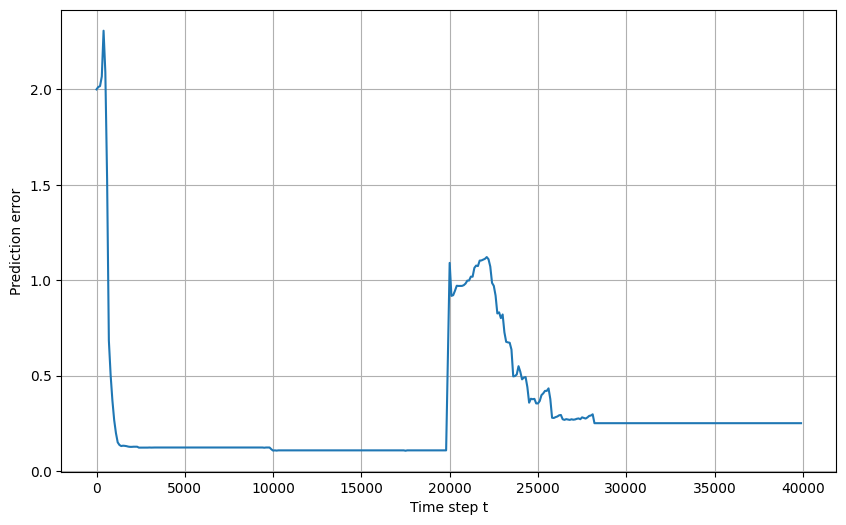

In [13]:
plot_error_by_period(df=case3_df)

# Case 4

In [14]:
case4_df = load_csv_data(config.case4_error_by_period_path)
case4_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000,Unnamed: 400,Unnamed: 401
0,2,2.01625,2.01250,2.03500,2.32125,2.17250,1.56750,0.748750,0.52250,0.368750,...,0.14625,0.143750,0.14625,0.143750,0.14625,0.143750,0.13875,0.12875,NaN,75.9700
1,2,2.01000,2.01375,2.03500,2.32375,2.17625,1.57250,0.753750,0.52750,0.371250,...,0.14875,0.148750,0.14875,0.148750,0.14875,0.148750,0.14375,0.13375,NaN,76.5188
2,2,2.01000,2.01750,2.04000,2.32875,2.18125,1.57375,0.753750,0.52750,0.371250,...,0.14625,0.141250,0.14375,0.146250,0.14375,0.148750,0.14125,0.12125,NaN,76.4913
3,2,2.02000,2.02500,2.04000,2.32750,2.18125,1.57375,0.753750,0.52625,0.371250,...,0.14125,0.146250,0.14375,0.143750,0.14375,0.146250,0.13875,0.12625,NaN,77.1350
4,2,2.00500,2.02125,2.13000,2.23000,2.03000,1.40125,0.553750,0.44125,0.340000,...,0.15500,0.155000,0.15500,0.155000,0.15500,0.155000,0.15000,0.14125,NaN,76.5425
5,2,2.01250,2.01750,2.04375,2.32500,2.17375,1.56875,0.753750,0.52750,0.371250,...,0.14625,0.143750,0.14375,0.146250,0.14375,0.143750,0.13875,0.12375,NaN,75.8363
6,2,2.00750,2.00750,2.13000,2.23625,2.03250,1.40375,0.556250,0.44625,0.342500,...,0.14375,0.138750,0.14125,0.143750,0.14375,0.138750,0.13625,0.12375,NaN,76.4838
7,2,2.01250,2.02000,2.04000,2.37000,1.95875,1.62375,0.698750,0.53000,0.408750,...,0.14625,0.143750,0.14625,0.143750,0.14625,0.143750,0.14125,0.12375,NaN,76.1538
8,2,2.00750,2.01250,2.13875,2.24125,2.04250,1.40375,0.556250,0.44375,0.340000,...,0.15500,0.155000,0.15500,0.155000,0.15500,0.155000,0.15000,0.14000,NaN,77.4725
9,2,2.02250,2.02500,2.04500,2.37250,1.95875,1.62000,0.697500,0.53000,0.408750,...,0.14625,0.147500,0.14625,0.147500,0.14625,0.147500,0.14125,0.13250,NaN,76.0850


In [15]:
# Get last row using values[] 
case4_df_average = case4_df[-1:]
dim = config.epoch // config.period
case4_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,39001~39100,39101~39200,39201~39300,39301~39400,39401~39500,39501~39600,39601~39700,39701~39800,39801~39900,39901~40000
10,2,2.01237,2.01725,2.06775,2.30763,2.09075,1.53088,0.682625,0.50225,0.369375,...,0.163375,0.163375,0.1475,0.146375,0.147,0.147375,0.14725,0.147125,0.142,0.1295


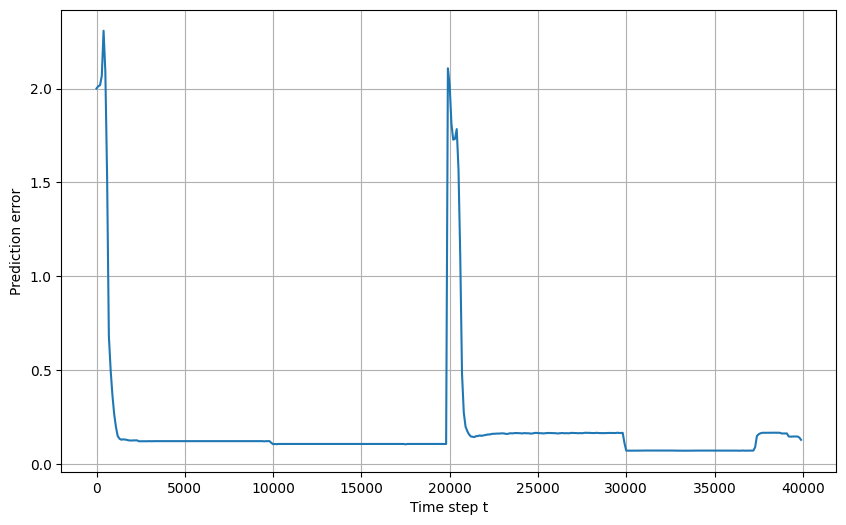

In [16]:
plot_error_by_period(df=case4_df)

## Summary

In [17]:
data_list = []

# The following are the case labels you want to pass
# labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
labels = ['Case 1', 'Case 4']

# The following are the case labels you want to pass
data_list.append(case1_df)    # Add error values for Case 1
# data_list.append(case2_df)    # Add error values for Case 2
# data_list.append(case3_df)    # Add error values for Case 3
data_list.append(case4_df)    # Add error values for Case 4

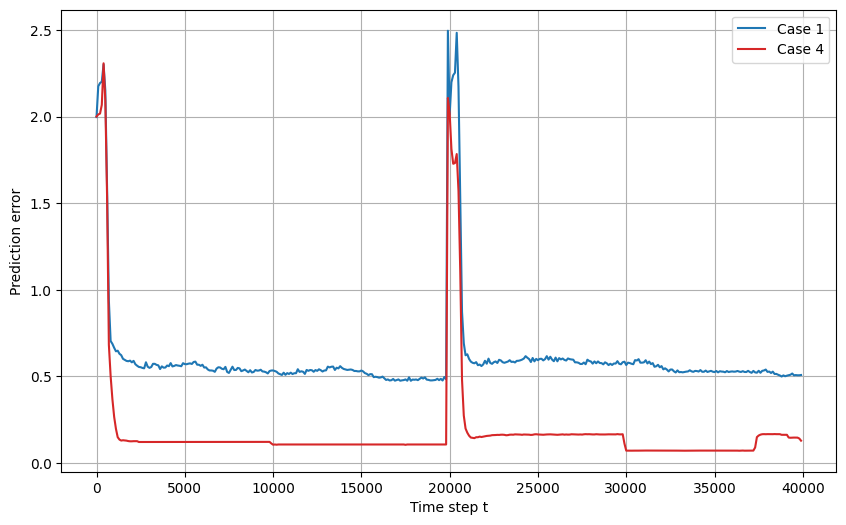

In [18]:
# plot_error_by_period_multiple(df_list=data_list)
plot_error_by_period_multiple_with_labels(df_list=data_list, labels=labels)